<a href="https://colab.research.google.com/github/2403a52030-sketch/NLP-LAB/blob/main/NLP_LAB_9_2030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gensim.downloader as api   # To load pre-trained embeddings
import numpy as np                # For numerical operations
import pandas as pd               # For displaying similarity results in table form
import matplotlib.pyplot as plt   # For visualization
from sklearn.decomposition import PCA  # For dimensionality reduction
from numpy.linalg import norm     # For cosine similarity calculation

In [ ]:
# Load embedding dataset
df = pd.read_csv("/content/word_embeddings_ready_dataset.csv")

# Display first 5 rows
df.head()

,word,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_41,dim_42,dim_43,dim_44,dim_45,dim_46,dim_47,dim_48,dim_49,dim_50
0,king,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
1,queen,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,...,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587
2,man,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,0.404051,1.886186,0.174578,0.257550,...,0.227460,1.307143,-1.607483,0.184634,0.259883,0.781823,-1.236951,-1.320457,0.521942,0.296985
3,woman,0.250493,0.346448,-0.680025,0.232254,0.293072,-0.714351,1.865775,0.473833,-1.191303,...,-0.446515,0.856399,0.214094,-1.245739,0.173181,0.385317,-0.883857,0.153725,0.058209,-1.142970
4,doctor,0.357787,0.560785,1.083051,1.053802,-1.377669,-0.937825,0.515035,0.513786,0.515048,...,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,1.765454,0.404982


In [ ]:
# Load GloVe 100-dimensional embeddings
model = api.load("glove-wiki-gigaword-100")

# Vocabulary size
print("Vocabulary size:", len(model.key_to_index))

# Display example word vector for 'king'
word = "king"
print(f"\nVector for '{word}':\n")
print(model[word])
print("\nVector dimension:", len(model[word]))

Vocabulary size: 400000

Vector for 'king':

[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.41394  -1.3363   -0.

In [ ]:
# Define pairs of words to calculate similarity for
word_pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("computer", "laptop"),
    ("paris", "france"),
    ("teacher", "student"),
    ("apple", "banana"),
    ("river", "ocean"),
    ("happy", "joy")
]

results = []

# Iterate through each word pair and calculate cosine similarity
for w1, w2 in word_pairs:
    similarity = model.similarity(w1, w2)
    results.append((w1, w2, similarity))

# Create a Pandas DataFrame to display the results
df = pd.DataFrame(results, columns=["Word1", "Word2", "Cosine Similarity"])
print(df)

      Word1    Word2  Cosine Similarity
0    doctor    nurse           0.752151
1       cat      dog           0.879807
2       car      bus           0.737271
3      king    queen           0.750769
4  computer   laptop           0.702416
5     paris   france           0.748159
6   teacher  student           0.808340
7     apple   banana           0.505447
8     river    ocean           0.574279
9     happy      joy           0.518885


In [ ]:
# Define a list of words to find similar terms for
test_words = ["king", "university", "computer", "music", "india"]

# Iterate through each test word
for word in test_words:
    print(f"\nTop 5 similar words to '{word}':")
    # Find the top 5 most similar words using the pre-trained model
    similar_words = model.most_similar(word, topn=5)

    # Print each similar word and its similarity score
    for similar_word, score in similar_words:
        print(f"{similar_word} : {score:.4f}")


Top 5 similar words to 'king':
prince : 0.7682
queen : 0.7508
son : 0.7021
brother : 0.6986
monarch : 0.6978

Top 5 similar words to 'university':
college : 0.8294
harvard : 0.8156
yale : 0.8114
professor : 0.8104
graduate : 0.7993

Top 5 similar words to 'computer':
computers : 0.8752
software : 0.8373
technology : 0.7642
pc : 0.7366
hardware : 0.7290

Top 5 similar words to 'music':
musical : 0.8128
songs : 0.7978
dance : 0.7897
pop : 0.7863
recording : 0.7651

Top 5 similar words to 'india':
pakistan : 0.8370
indian : 0.7802
delhi : 0.7712
bangladesh : 0.7662
lanka : 0.7639


In [ ]:
# Define a list of analogies in the format (word_a, word_b, word_c) for a - b + c = ?
analogies = [
    ("king", "man", "woman"),
    ("paris", "france", "india"),
    ("teacher", "school", "hospital")
]

# Iterate through each analogy
for a, b, c in analogies:
    print(f"\n{a} - {b} + {c} = ?")
    # Solve the analogy using the model's most_similar method
    # 'positive' words are added, 'negative' words are subtracted from the vector space
    result = model.most_similar(positive=[a, c], negative=[b], topn=1)
    print("Answer:", result)


king - man + woman = ?
Answer: [('queen', 0.7698540687561035)]

paris - france + india = ?
Answer: [('delhi', 0.8654932975769043)]

teacher - school + hospital = ?
Answer: [('nurse', 0.7798740267753601)]


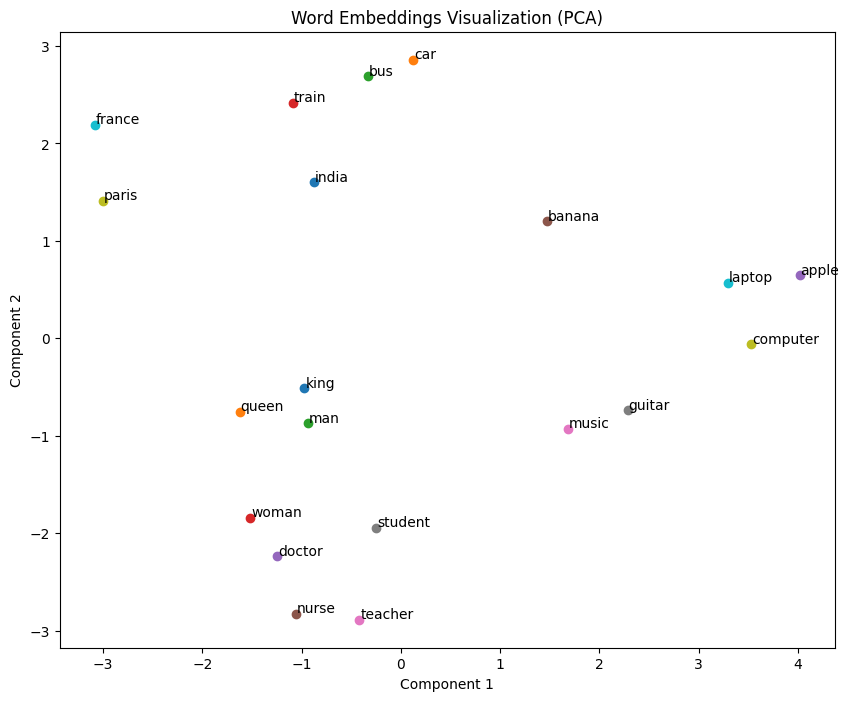

In [ ]:
# Define a list of words to visualize
words = ["king", "queen", "man", "woman", "doctor", "nurse",
         "teacher", "student", "paris", "france", "india",
         "car", "bus", "train", "apple", "banana",
         "music", "guitar", "computer", "laptop"]

# Get the vector representation for each word
vectors = np.array([model[word] for word in words])

# Reduce the dimensionality of the word vectors to 2D using PCA for plotting
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot the 2D reduced vectors
plt.figure(figsize=(10,8))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i,0], reduced_vectors[i,1]) # Plot each word as a point
    plt.text(reduced_vectors[i,0]+0.01, reduced_vectors[i,1]+0.01, word) # Annotate the point with the word

plt.title("Word Embeddings Visualization (PCA)") # Set plot title
plt.xlabel("Component 1") # Set x-axis label
plt.ylabel("Component 2") # Set y-axis label
plt.show() # Display the plot